In [2]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("Customer_Churn_dataset.csv")


In [7]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [8]:
df.shape

(5630, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# CHECK & HANDLE MISSING VALUES

In [10]:
# Check missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


In [11]:
# Fill missing values
for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)




C:\Users\lenov\AppData\Local\Temp\ipykernel_16548\3583279866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lenov\AppData\Local\Temp\ipykernel_16548\3583279866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [16]:
# Verify no missing values remain
print("\nMissing values after treatment:")
print(df.isnull().sum())


Missing values after treatment:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [22]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.221492
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [ ]:
# Check Duplicate
df.duplicated().sum()

np.int64(0)

In [25]:
df['CustomerID'].duplicated().sum()

np.int64(0)

In [18]:
# Churn distribution
churn_counts = df["Churn"].value_counts()
print(churn_counts)

Churn
0    4682
1     948
Name: count, dtype: int64


In [21]:
# Churn percentage
churn_percentage = df["Churn"].value_counts(normalize=True)*100
print(churn_percentage)

Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


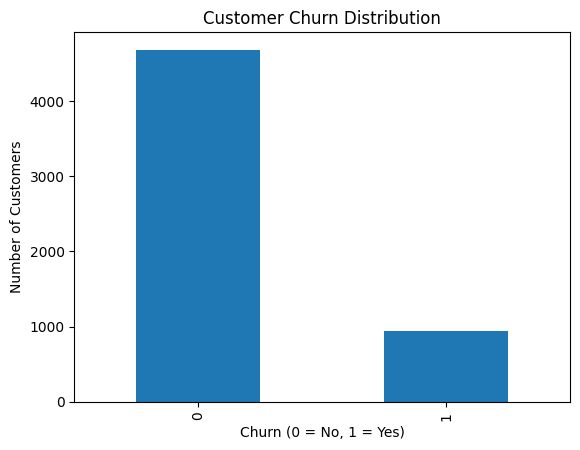

In [26]:
#  Bar chart for churn
df["Churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

Text(0.5, 1.0, 'Count of customer by churn')

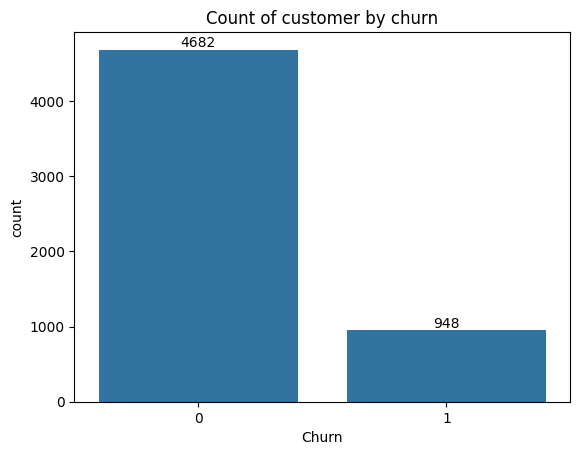

In [27]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn")

# Churn VS Gender

In [28]:
churn_gender = pd.crosstab(df["Gender"], df["Churn"])
print("\nChurn by Gender:")
print(churn_gender)



Churn by Gender:
Churn      0    1
Gender           
Female  1898  348
Male    2784  600


# Churn vs Preffered Login Device


In [29]:
churn_device = pd.crosstab(df["PreferredLoginDevice"], df["Churn"])
print("\nChurn by Login Device:")
print(churn_device)



Churn by Login Device:
Churn                    0    1
PreferredLoginDevice           
Computer              1310  324
Mobile Phone          2417  348
Phone                  955  276


# Churn vs City Tier

In [30]:
churn_city = pd.crosstab(df["CityTier"], df["Churn"])
print("\nChurn by City Tier:")
print(churn_city)



Churn by City Tier:
Churn        0    1
CityTier           
1         3134  532
2          194   48
3         1354  368


In [31]:
# Find categorical Values
categorical_cols = df.select_dtypes(include="object").columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [34]:
df.select_dtypes(include="object").columns


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

# CORRELATION WITH CHURN

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Encoding completed. Remaining object columns:")
print(df.select_dtypes(include="object").columns)


Encoding completed. Remaining object columns:
Index([], dtype='object')


In [38]:
correlation = df.corr()["Churn"].sort_values(ascending=False)
print("\nCorrelation with Churn:")
print(correlation)



Correlation with Churn:
Churn                          1.000000
Complain                       0.250188
MaritalStatus                  0.140316
PreferedOrderCat               0.118922
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.069544
NumberOfAddress                0.043931
Gender                         0.029264
HourSpendOnApp                 0.018816
PreferredLoginDevice           0.013281
CouponUsed                    -0.001430
OrderAmountHikeFromlastYear   -0.007075
CustomerID                    -0.019083
OrderCount                    -0.024038
PreferredPaymentMode          -0.026519
CashbackAmount                -0.154161
DaySinceLastOrder             -0.155871
Tenure                        -0.337831
Name: Churn, dtype: float64


# Churn vs Complain

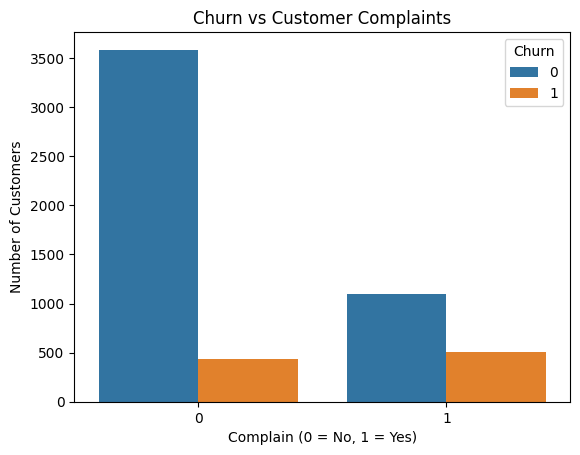

In [ ]:


sns.countplot(x="Complain", hue="Churn", data=df)
plt.title("Churn vs Customer Complaints")
plt.xlabel("Complain (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()                             # Customer who complained churn significantly more


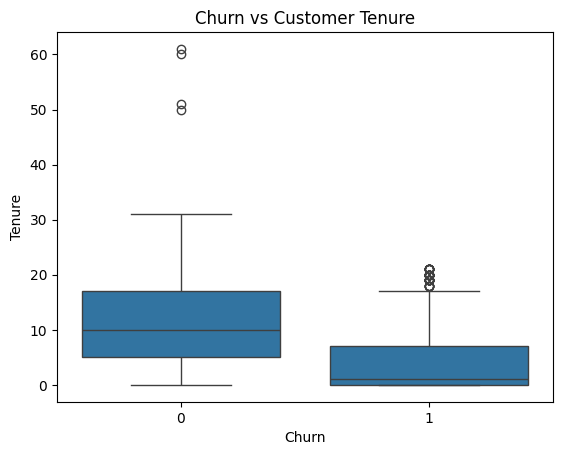

In [ ]:
# Churn vs Tenure
sns.boxplot(x="Churn", y="Tenure", data=df)
plt.title("Churn vs Customer Tenure")
plt.show()                     #Churn customer has lower tenure


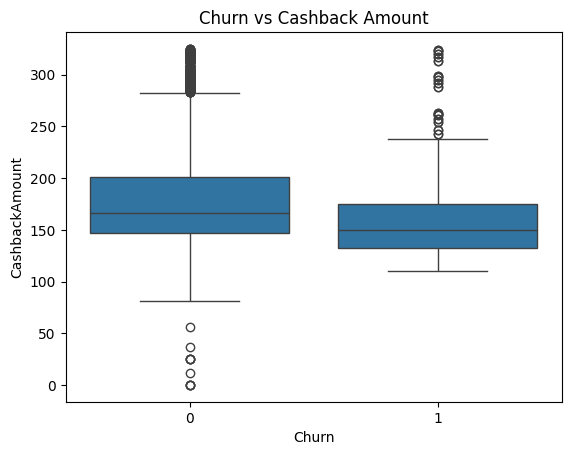

In [ ]:
# Churn vs CashbackAmount
sns.boxplot(x="Churn", y="CashbackAmount", data=df)
plt.title("Churn vs Cashback Amount")
plt.show()     #Higher Cashback Lower churn



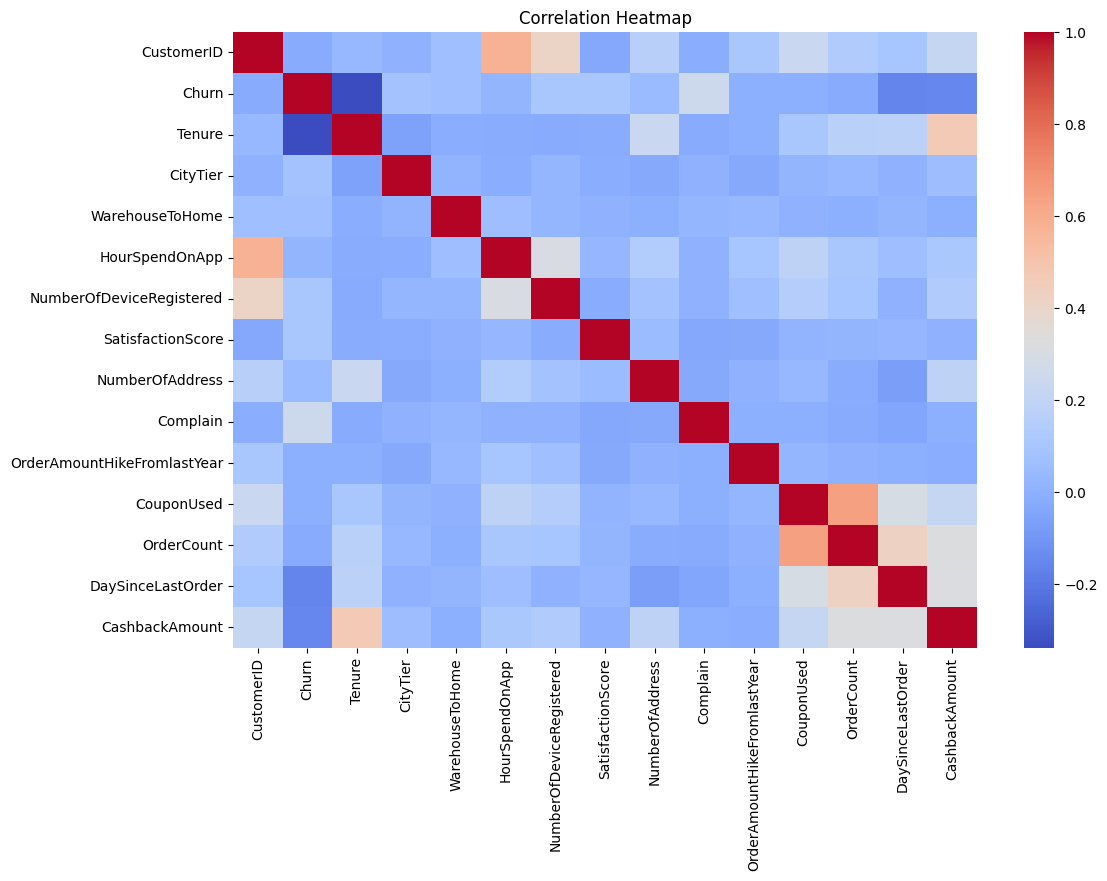

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
